<h2>Predicting Titanic Survivors with Machine Learning</h2>

<h3>Objetive</h3>

The goal of this project is to develop a machine learning model to predict whether a passenger on the Titanic survived or not, based on various features such as age, gender, class, and ticket fare.

<h3>Dataset</h3>

The dataset used is the famous Titanic dataset, containing information about passengers, including whether they survived or not. It includes features such as age, sex, ticket class, and embarkation point.
The dataset can be downloaded here: https://www.kaggle.com/competitions/titanic/data

<h3>Data Dictionary</h3>

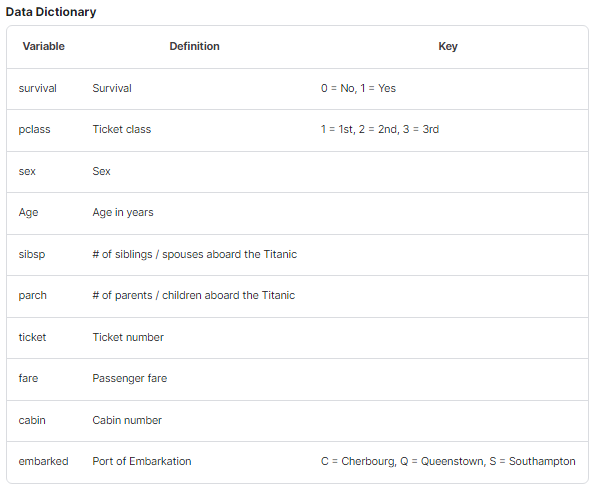

<h3>About the data</h3>

<p><strong>According to the dataset owner (Kaggle):</strong></p>

<p>The <b>training set</b> should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.</p>

<p>The <b>test set</b> should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.</p>

<h2>Step 1 - Problem Identification</h2>

<p><b>Some Relevant information about the disaster:</b></p>

<ul>
    <li>On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.</li>
    <li>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.</li>
    <li>Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.</li>
</ul>

<p><b>Problem to be solved:</b> "Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not."</p>

<h2>Step 2 - Data Collection</h2>

<p>Before acquiring the dat, we will import the needed libraries to proceed with the project</p>

In [186]:
# data mining and analysis
import pandas as pd #import pandas to deal with dataframes
import numpy as np #import numpy to work with math functions

# statistics
import scipy.stats

# visualition of data
import matplotlib.pyplot as plt # library that allows you to build graphs
import seaborn as sns

# machine learning algorithms (from sklearn library)
from sklearn.tree import DecisionTreeClassifier, plot_tree # algorithm based on decision tree
from sklearn.linear_model import LinearRegression # algorithm based on linear regression
from sklearn.linear_model import LogisticRegression # algorithm based on logistics regression
from sklearn.neighbors import KNeighborsClassifier # algorithms based on k-nearest neighbors
from sklearn.svm import SVC, LinearSVC # algorithm based on Support Vector Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron # neural network with 1 neuron
from sklearn.linear_model import SGDClassifier 

<p>With the libraries imported, it is possible to proceed with the data acquisition</p>

In [187]:
# using the read_csv from Pandas to acquire the data
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')

In [188]:
# Show the first 5 rows of train_df
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
# Show the first 5 rows of test_df
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h2>Step 3 - Data Exploration and Preparation</h2>

<p>To understand how to prepare the dataset, it is necessary to analyze by describing data </p>

<p>Lets see the columns names: </p>

In [190]:
display(train_df.columns.values)

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<p>By looking the features (columns names), it is possible to separete the categorical and numerical data (continuous or discrete).</p>

<ul>
    <li><b>Categorical:</b> Survived, Sex, Embarked and Pclass (Pclass is also an ordinal data)</li>
    <li><b>Continuous: </b>Age, Fare. Discrete: SibSp, Parch</li>
    <li><b>DIscrete: </b> SibSp, Parch</li>
</ul>

<p>Now, lets see the data type of each feature:</p>

In [191]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<p>We can see that "Age", "Cabin" and "Embarked" contains null values</p>

<p>Lets use Describe to see more info:</p>

In [192]:
display(train_df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [193]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johansson, Mr. Erik",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


<h3>Assumptions based on first exploration of the data:</h3>

<p>1 - We need to complete the "Age" and "Fare" data, as it is probably correleted to survival</p>
<p>2 - There are a lot of duplicate values for Ticket (891 passengers and 681 unique values for Tickets (23% of duplicates values)), however Ticker may not be correleted to survival, so we can drop this feature </p>
<p>3 - Does not make sense to use "Name" to predict survival, so we can drop the feature</p>
<p>4 - Does not make sense to use "PassengerID" to predict survival, so we can drop the feature</p>
<p>5 - "Cabin" could be a relevant feature, however there are only 23% of available information (204 of 891), so seems to be better drop this feature</p>
<p>6 - Maybe it is a good approach create a new feature named family containing thee sum of "SibSp" and "Parch", this way we will have a feature with the total of family member on board the ship</p>

<h3>Preparing the data:</h3>

<p>1 - We need to complete the "Age" and "Fare" data, as it is probably correleted to survival</p>

In [194]:
# I will complete this missing value of the mean of Age feature (looks like a good approach for age)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean()) #filling the age of train dataset
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean()) #filling the age of test dataset
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].mean()) #filling the Fare of train dataset
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean()) #filling the Fare of test dataset

<p>2 - There are a lot of duplicate values for Ticket (891 passengers and 681 unique values for Tickets (23% of duplicates values)), however Ticker may not be correleted to survival, so we can drop this feature </p>
<p>3 - Does not make sense to use "Name" to predict survival, so we can drop the feature</p>
<p>4 - Does not make sense to use "PassengerID" to predict survival, so we can drop the feature</p>
<p>5 - "Cabin" could be a relevant feature, however there are only 23% of available information (204 of 891), so seems to be better drop this feature</p>

In [195]:
# drop the columns using "drop" method of Pandas
train_df.drop(["Ticket","Name","PassengerId","Cabin"], axis=1, inplace=True) # drop features of train dataset
test_df.drop(["Ticket","Name","Cabin"], axis=1, inplace=True) # drop features of test dataset

<p>6 - Maybe it is a good approach create a new feature named family containing thee sum of "SibSp" and "Parch", this way we will have a feature with the total of family member on board the ship</p>

In [196]:
# Creating the new feature
train_df['Family'] = train_df['SibSp'] + train_df['Parch'] # create the new column in the train dataset
test_df['Family'] = test_df['SibSp'] + test_df['Parch'] # create the new column in the test dataset

<p>Now we can advance with the data analysis to learn more about the features correlation with survival...</p>

In [197]:
# preprocessed dataset train_df
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


<h2>Step 3 - Data Analysis</h2>

<h3>Lets try to find correlations between the features and survival</h3>

In [198]:
# Displaying the correlation between the features
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.065997
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.248512
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.217138
Family,0.016639,0.065997,-0.248512,0.890712,0.783111,0.217138,1.000000


In [199]:
# analyzing correlation between "Sex" and survival
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<p>It is possible to see that “Sex” has a strong correlation with survival, where 74% of survivors were women</p>

In [200]:
# analyzing correlation between "Pclass" and survival
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [201]:
# doing statistics analysis using Scipy
print(scipy.stats.pearsonr(train_df['Pclass'], train_df['Survived']))    # Pearson's r method
print(scipy.stats.spearmanr(train_df['Pclass'], train_df['Survived']))   # Spearman's rho  method
print(scipy.stats.kendalltau(train_df['Pclass'], train_df['Survived']))  # Kendall's tau method

(-0.3384810359610153, 2.537047387978631e-25)
SpearmanrResult(correlation=-0.33966793665005257, pvalue=1.6876081409966053e-25)
KendalltauResult(correlation=-0.3235331843940954, pvalue=3.932785644652632e-24)


<p>We can note that 63% of survivors were in the Pclass number 1. The correlation number is about -0.33, what indicates a weak negative correlation between Pclass and survival, however it worths to keep this feature in the analysis</p>

In [202]:
# analyzing correlation between "Family" and survival
train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [203]:
# doing statistics analysis using Scipy
print(scipy.stats.pearsonr(train_df['Family'], train_df['Survived']))    # Pearson's r method
print(scipy.stats.spearmanr(train_df['Family'], train_df['Survived']))   # Spearman's rho  method
print(scipy.stats.kendalltau(train_df['Family'], train_df['Survived']))  # Kendall's tau method

(0.01663898928274522, 0.6198911221336836)
SpearmanrResult(correlation=0.16546291168480362, pvalue=6.822728892835777e-07)
KendalltauResult(correlation=0.15486331354332258, pvalue=7.964587976640051e-07)


<p>Statistically, there is a very weak correlation between "Family" and survival (correlation about 0.1), so lets just drop this column</p>

In [204]:
# drop the columns using "drop" method of Pandas
train_df.drop(["Family","SibSp","Parch"], axis=1, inplace=True) # drop features of train dataset
test_df.drop(["Family","SibSp","Parch"], axis=1, inplace=True) # drop features of test dataset

<h3>Now lets try to visualize the correlations by plotting data</h3>

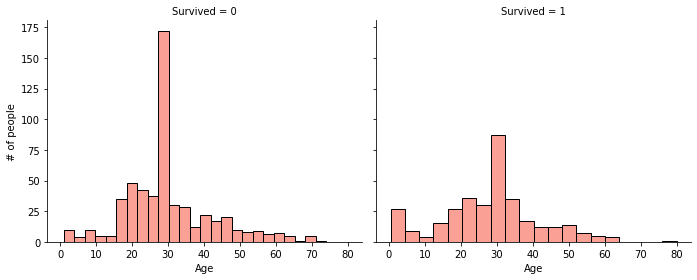

In [205]:
#create the facetgrid with seaborn library
g = sns.FacetGrid(train_df, col='Survived', height=4, aspect=1.2)
#create the plot
g.map(sns.histplot, "Age", color='salmon')
#the plot can also be done with matplotlib library, as showed below
#g.map(plt.hist, 'Age', bins=20, color='salmon')
#insert ylabel
g.set_ylabels("# of people")

<p>We can see that a large number of children (under 10 years old) survived, and also the majority of elderly people (over 80 years old) survived</p>

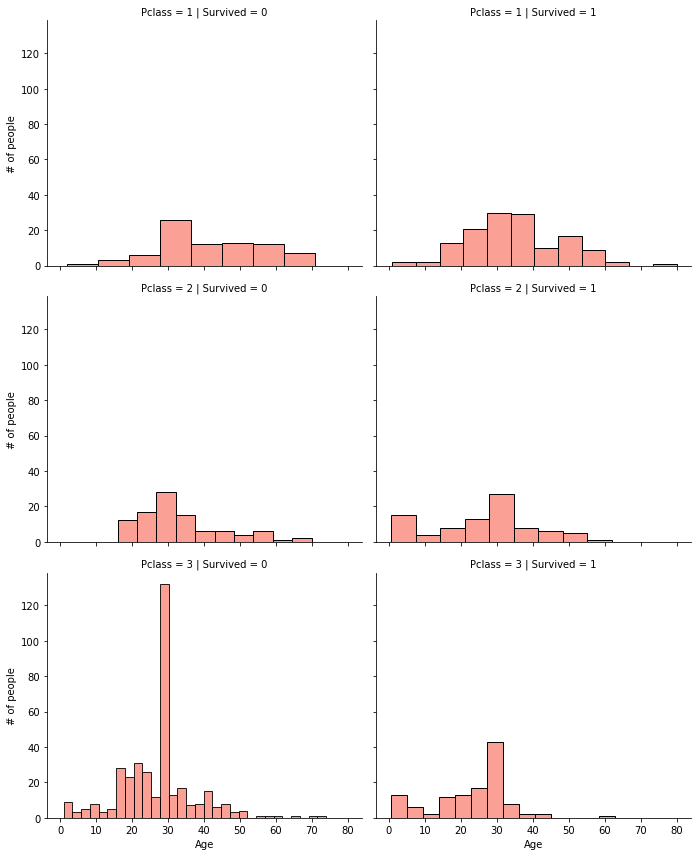

In [206]:
#create the facetgrid with seaborn library
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=4, aspect=1.2)
#create the plot
g.map(sns.histplot, "Age", color='salmon')
#insert ylabel
g.set_ylabels("# of people")

<p>Most people were in the class 3, however, most of people from these class did not survived</p>

c:\Users\felip\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\felip\anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


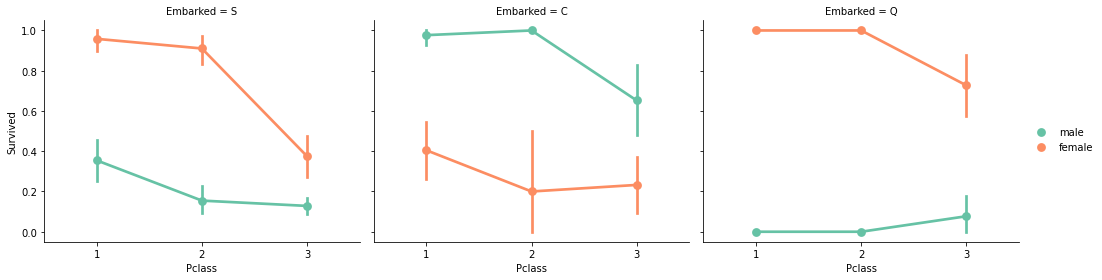

In [207]:
#create the facetgrid with seaborn library
grid = sns.FacetGrid(train_df, col='Embarked', height=4, aspect=1.2)
#create the plot
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='Set2')
#add legend to be able to know which are women and men
grid.add_legend()

<p>The only scenario that women survived less than men is for those who embarked on C (Cherbourg). That means that maybe the port of embarkation is relevent and related with the survival rate</p>

c:\Users\felip\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


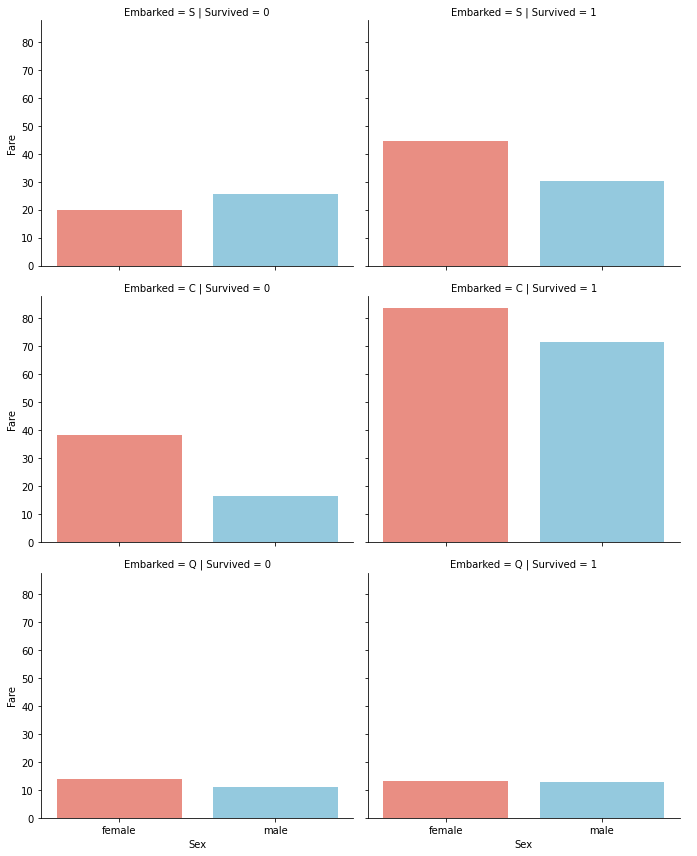

In [208]:
#create the facetgrid with seaborn library
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=4, aspect=1.2)
#create the plot
grid.map(sns.barplot, 'Sex', 'Fare', ci=None, palette=['salmon','skyblue'])
#add the legend
grid.add_legend()

<p>It is possible to see that higher Fare has a direct correlation with survival, both for men and women who embarked in the ports S and C</p>

<h2>Step 4 - Model Building</h2>

In [209]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

<h3>Based on the analysis done, it was decided to use the columns 'Pclass', 'Sex', 'Age', 'Fare' and 'Embarked' in the model. to do that, we just need to adjust these features to improve the results. The steps are:</h3>

<p>1 - Convert the sex to numbers (1 = male / 2 = female)</p>
<p>2 - Convert embark to numbers (1 = C / 2 = Q / 3 = S)</p>


<p>Applying the changes:</p>

<p>1 - Convert the sex to numbers (1 = male / 2 = female)</p>
<p>2 - Convert embark to numbers (1 = C / 2 = Q / 3 = S)</p>

In [210]:
#As Embarked feature has 2 missing values, we will drop these 2 samples 
#(it represents 0.2% of the total train data, so it is not a relevant quantity and we can drop it)
train_df.dropna(subset=['Embarked'], inplace=True)
test_df.dropna(subset=['Embarked'], inplace=True)

In [211]:
#convert "Sex" to train and test data
train_df['Sex'] = train_df['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_df['Sex'] = test_df['Sex'].map({'female': 1, 'male': 0}).astype(int)
#convert "Embarked" to train and test data
train_df['Embarked'] = train_df['Embarked'].map({'C': 1, 'Q': 2, 'S': 3}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'C': 1, 'Q': 2, 'S': 3}).astype(int)

In [212]:
#checking the data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   Fare      889 non-null    float64
 5   Embarked  889 non-null    int32  
dtypes: float64(2), int32(2), int64(2)
memory usage: 41.7 KB


In [213]:
#checking the data values
train_df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,3
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,3
3,1,1,1,35.0,53.1000,3
4,0,3,0,35.0,8.0500,3


<p><strong>Now the data is ready to be used in the model</strong></p>

<h3>Decision Tree</h3>

<p>Separating X_train and y_train</p>

In [214]:
#separating X and y train
X_train = train_df.drop(columns='Survived', axis=1)
y_train = train_df['Survived']

<p>Creating the model</p>

In [215]:
#creating the classifier
clf_Tree = DecisionTreeClassifier()
#training the algorithm with the train data
clf_Tree.fit(X_train, y_train)

DecisionTreeClassifier()

<p>Check and save the score</p>

In [216]:
#verify the score of the fitting
print("The score of the fitting of data on the algorithm is:", clf_Tree.score(X_train, y_train))
#creating a score dataframe to compare best results later
score_df = pd.DataFrame({'Algorithm':[], 'Score':[]})
#adding decision tree score in this dataframe
score_df = score_df.append({'Algorithm':'Decision Tree', 'Score':clf_Tree.score(X_train, y_train)},ignore_index=True)
#show dataframe
display(score_df)

The score of the fitting of data on the algorithm is: 0.9797525309336333


,Algorithm,Score
0,Decision Tree,0.979753


<p>Visualizing the tree</p>

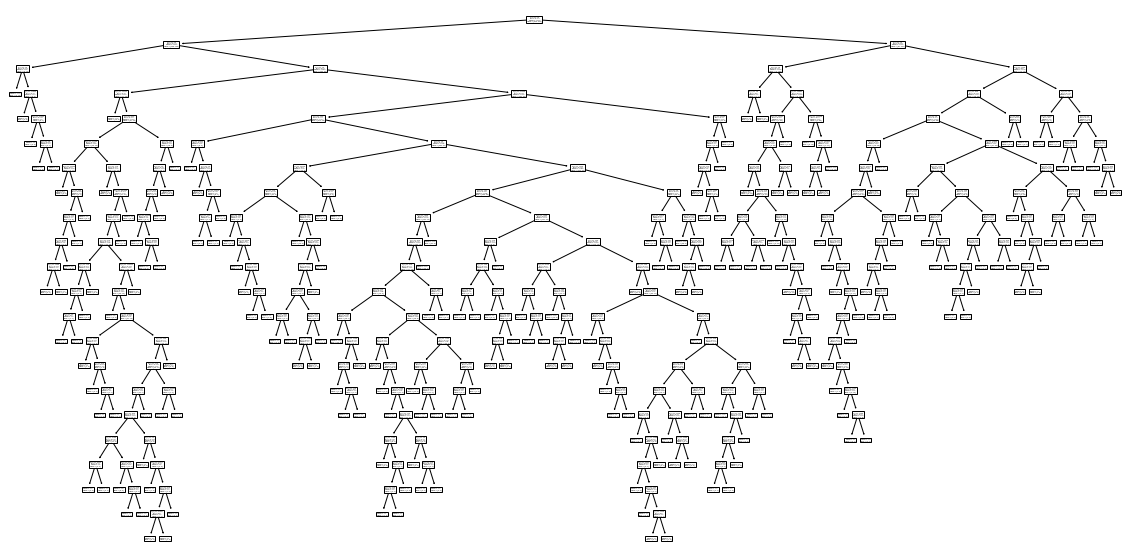

In [217]:
# Increase the size of the plot
plt.figure(figsize=(20, 10)) 
#see the tree
plot_tree(clf_Tree) 
plt.show()

<h3>Logistic Regression</h3>

<p>Creating the model</p>

In [218]:
#creating the classifier
clf_logReg = LogisticRegression()
#fitting the data 
clf_logReg.fit(X_train, y_train)

LogisticRegression()

<p>Check and save the score</p>

In [219]:
#adding decision tree score in this dataframe
score_df = score_df.append({'Algorithm':'Logistic Regression', 'Score':clf_logReg.score(X_train, y_train)},ignore_index=True)
#show dataframe
display(score_df)

,Algorithm,Score
0,Decision Tree,0.979753
1,Logistic Regression,0.789651


<p>Finding the coefs</p>

In [220]:
#angular coef
print("Angular coef:", clf_logReg.coef_)
#linear coef
print("Linear coef:", clf_logReg.intercept_)

Angular coef: [[-1.10486213e+00  2.49550302e+00 -3.30015130e-02 -9.14699736e-05
  -2.77020384e-01]]
Linear coef: [2.71265359]


<h3>K-nearest Neighbors</h3>

<p>Creating the model</p>

In [221]:
#creating the classifier
clf_knn = KNeighborsClassifier(n_neighbors=2)
#fitting the data 
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

<p>Check and save the score</p>

In [222]:
#adding decision tree score in this dataframe
score_df = score_df.append({'Algorithm':'K-nearest Neighbors', 'Score':clf_knn.score(X_train, y_train)},ignore_index=True)
#show dataframe
display(score_df)

,Algorithm,Score
0,Decision Tree,0.979753
1,Logistic Regression,0.789651
2,K-nearest Neighbors,0.833521


<h3>Support Vector Machine (SVM)</h3>

<p>Creating the model</p>

In [223]:
#creating the classifier
clf_svm = SVC(kernel='linear')
#fitting the data 
clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

<p>Check and save the score</p>

In [224]:
#adding decision tree score in this dataframe
score_df = score_df.append({'Algorithm':'Support Vector Machine', 'Score':clf_svm.score(X_train, y_train)},ignore_index=True)
#show dataframe
display(score_df)

,Algorithm,Score
0,Decision Tree,0.979753
1,Logistic Regression,0.789651
2,K-nearest Neighbors,0.833521
3,Support Vector Machine,0.786277


<h3>Perceptron</h3>

<p>Creating the model</p>

In [225]:
#creating the classifier
clf_perc = Perceptron()
#fitting the data 
clf_perc.fit(X_train, y_train)

Perceptron()

<p>Check and save the score</p>

In [226]:
#adding decision tree score in this dataframe
score_df = score_df.append({'Algorithm':'Perceptron', 'Score':clf_perc.score(X_train, y_train)},ignore_index=True)
#show dataframe
display(score_df)

,Algorithm,Score
0,Decision Tree,0.979753
1,Logistic Regression,0.789651
2,K-nearest Neighbors,0.833521
3,Support Vector Machine,0.786277
4,Perceptron,0.456693


<h3>Stochastic Gradient Descent</h3>

<p>Creating the model</p>

In [227]:
#creating the classifier
clf_sgd = SGDClassifier()
#fitting the data 
clf_sgd.fit(X_train, y_train)

SGDClassifier()

<p>Check and save the score</p>

In [228]:
#adding decision tree score in this dataframe
score_df = score_df.append({'Algorithm':'Stochastic Gradient Descent', 'Score':clf_sgd.score(X_train, y_train)},ignore_index=True)
#show dataframe
display(score_df)

,Algorithm,Score
0,Decision Tree,0.979753
1,Logistic Regression,0.789651
2,K-nearest Neighbors,0.833521
3,Support Vector Machine,0.786277
4,Perceptron,0.456693
5,Stochastic Gradient Descent,0.708661


<h3>Random Forest</h3>

<p>Creating the model</p>

In [229]:
#creating the classifier
clf_randForest = RandomForestClassifier()
#fitting the data 
clf_randForest.fit(X_train, y_train)

RandomForestClassifier()

<p>Check and save the score</p>

In [230]:
#adding decision tree score in this dataframe
score_df = score_df.append({'Algorithm':'Randon Forest', 'Score':clf_randForest.fit(X_train, y_train).score(X_train, y_train)},ignore_index=True)
#show dataframe
display(score_df)

,Algorithm,Score
0,Decision Tree,0.979753
1,Logistic Regression,0.789651
2,K-nearest Neighbors,0.833521
3,Support Vector Machine,0.786277
4,Perceptron,0.456693
5,Stochastic Gradient Descent,0.708661
6,Randon Forest,0.979753


<h3>Gaussian Naive Bayes</h3>

<p>Creating the model</p>

In [231]:
#creating the classifier
clf_gnb = GaussianNB()
#fitting the data 
clf_gnb.fit(X_train, y_train)


GaussianNB()

<p>Check and save the score</p>

In [232]:
#adding decision tree score in this dataframe
score_df = score_df.append({'Algorithm':'Gaussian NB', 'Score':clf_gnb.fit(X_train, y_train).score(X_train, y_train)},ignore_index=True)
#show dataframe
display(score_df)

,Algorithm,Score
0,Decision Tree,0.979753
1,Logistic Regression,0.789651
2,K-nearest Neighbors,0.833521
3,Support Vector Machine,0.786277
4,Perceptron,0.456693
5,Stochastic Gradient Descent,0.708661
6,Randon Forest,0.979753
7,Gaussian NB,0.784027


<h2>Step 5 - Model Evaluation</h2>

<h3>To evaluate the models, lets check the best scores</h3>

In [233]:
#sort the scores to find the best algorithms for the train data
display(score_df.sort_values(by='Score', ascending=False).reset_index(drop=True))

,Algorithm,Score
0,Decision Tree,0.979753
1,Randon Forest,0.979753
2,K-nearest Neighbors,0.833521
3,Logistic Regression,0.789651
4,Support Vector Machine,0.786277
5,Gaussian NB,0.784027
6,Stochastic Gradient Descent,0.708661
7,Perceptron,0.456693


<p>It is possible to see that both Decision Tree and Random Forest got the best results (score = 0.979753). So we will choose Decision Tree to predict the survivors for the test data</p>

<h2>Step 6 - Model Deployment</h2>

<p>Predicting survivors with decision tree</p>

In [243]:
#Predicting results
X_test = test_df.drop(columns='PassengerId', axis=1)
y_pred = clf_Tree.predict(X_test)
#Check the results
display(y_pred)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<p>Creating the output table</p>

In [244]:
#creating the dataframe with PassengerID and Survived
output_df = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
        })
#Exporting to a CSV file
output_df.to_csv('./datasets/output.csv', index=False)

<p>After submitting it on the Kaggle website, the result was that we correctly predicted 75% of survivals</p>